# Deaths by COVID-19 in Bulgaria

Data for the deaths is scraped from the site of the Bulgarian Ministry of Health(https://www.mh.government.bg/). Data for cases taken from http://coronavirus.bg. Report is done for the period between 29.04.2020 and 12.11.2020 over 1712 deaths. Cases data is scaled based on the proportion of extracted deaths in the data compared to all reported deaths(~90%). Due to the limited data for cases(only split by age group) different splits on probabilites by disease, sex and others are not possible.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

from src.text_processor import augment_deaths_stats, comorbidities_translations

sns.set(rc={'figure.figsize': (12, 6)})

In [2]:
CASES_ON_DEATHS = 1898 # total deaths reported from the cases source

cases = pd.read_csv("data/cases.csv") 
deaths = pd.read_csv("data/deaths.csv")
deaths = augment_deaths_stats(deaths, cases)

In [ ]:
print("Deaths for the period {} - {}: {}({:,.2%})".format(deaths["date"].min(), deaths["date"].max(), len(deaths), len(deaths) / CASES_ON_DEATHS))

In [4]:
cases["scaled_cases"] = cases["cases"] * len(deaths) / CASES_ON_DEATHS

## Probability of dying by age group 

Probability of dying from COVID-19 **having a positive test** for COVID-19 broken down by age group. The probability for each age group is the number of deaths divided by the scaled number of cases.

In [5]:
death_probability = (deaths.groupby("age_group").size().to_frame()[0] / cases.set_index("age_group")["scaled_cases"]).fillna(0).to_frame().rename(columns={0: "probability"})
output = death_probability.to_html(formatters={"probability": "{:,.2%}".format})
display(HTML(output))

,probability
age_group,
0-19,0.02%
20-29,0.07%
30-39,0.14%
40-49,0.48%
50-59,1.37%
60-69,4.14%
70-79,9.71%
80-89,17.29%
90+,18.57%


## Deaths by age

Histogram of number of deaths by age group. The distribution here depends on the age distributions of the infected people and the age distribution of the population in Bulgaria.

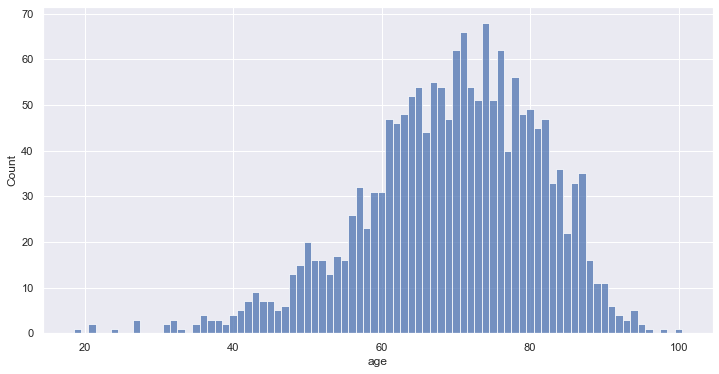

In [6]:
sns.histplot(data=deaths, x="age", discrete=True)
plt.show()

## Deaths with comorbidities

Percentage of all reported deaths that has a disease or no disease.

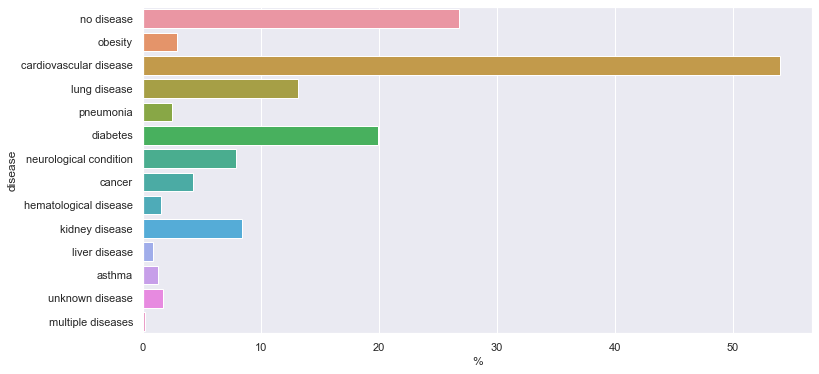

In [7]:
disease_deaths = [("no disease", 100 * len(deaths[deaths["comorbidities"].isnull()]) / len(deaths))]
for disease in comorbidities_translations.values():
    mask = deaths["comorbidities"].apply(lambda x: disease in x if x is not None else False)
    disease_deaths.append((disease, 100 * len(deaths[mask]) / len(deaths)))

sns.barplot(data=pd.DataFrame(disease_deaths, columns=["disease", "%"]), x="%", y="disease")
plt.show()

## Deaths by sex

Count of deaths by reported sex.

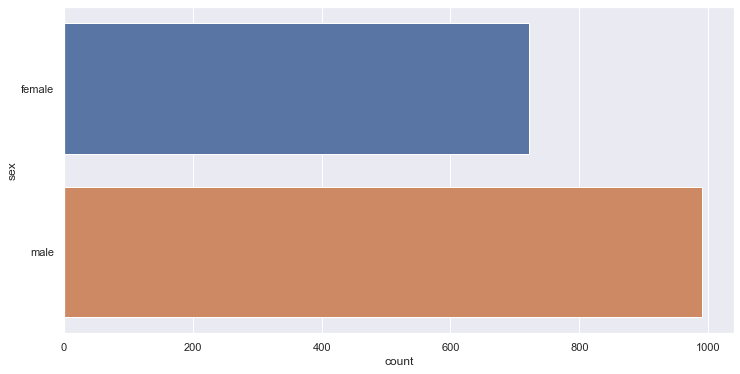

In [8]:
sns.countplot(data=deaths, y="sex")
plt.show()

## Deaths by age (without known diseases)

Distribution of deaths by age for people without reported comorbidities.

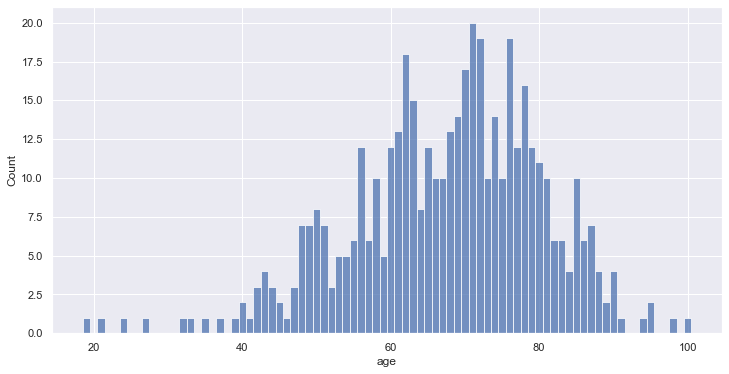

In [9]:
sns.histplot(data=deaths[deaths["comorbidities"].isnull()], x="age", discrete=True)
plt.show()